In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df02 = pd.read_csv('WineQT.csv')


In [38]:
df02.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [39]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [40]:
Null_values = print(df02.isnull().sum())

Duplicates = df02.duplicated().sum()
print(Duplicates)

X = df02.drop('quality', axis=1)
y = df02['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
0


In [41]:
df02.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#**Classifier Model - 1. Random Forest Classifier**

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.6899563318777293
Random Forest Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229

Random Forest Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 70  5  0]
 [ 0  0 10 16  0]
 [ 0  0  2  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Classifier Model - 2. Stochastic Gradient Descent (SGD) Classifier**

In [43]:
sgd = SGDClassifier(random_state=42)

sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)

print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("SGD Classifier Classification Report:\n", classification_report(y_test, y_pred_sgd))
print("SGD Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))


SGD Classifier Accuracy: 0.5851528384279476
SGD Classifier Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34       229
weighted avg       0.61      0.59      0.57       229

SGD Classifier Confusion Matrix:
 [[ 0  2  4  0  0]
 [ 0 75 12  8  1]
 [ 0 31 39 29  0]
 [ 0  2  4 20  0]
 [ 0  0  0  2  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Classifier Model - 3. Support Vector Classifier**

In [44]:
svc = SVC(random_state=42)

svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


SVC Accuracy: 0.6550218340611353
SVC Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.61      0.70      0.65        99
           7       0.69      0.35      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.36      0.37       229
weighted avg       0.64      0.66      0.64       229

SVC Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 27 69  3  0]
 [ 0  1 16  9  0]
 [ 0  0  1  1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Visualization**

Bar plot


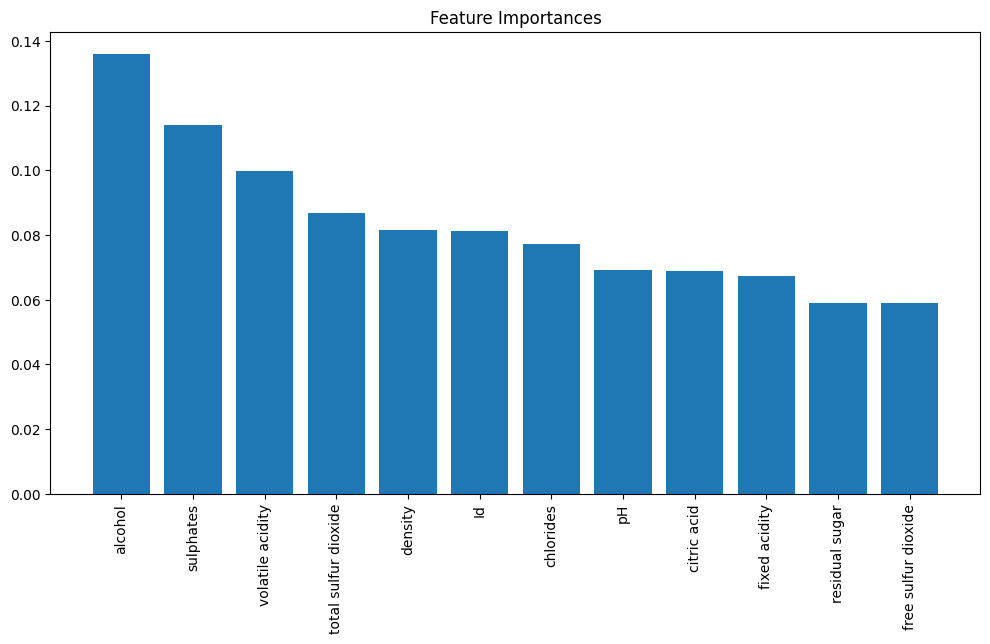

Heatmap


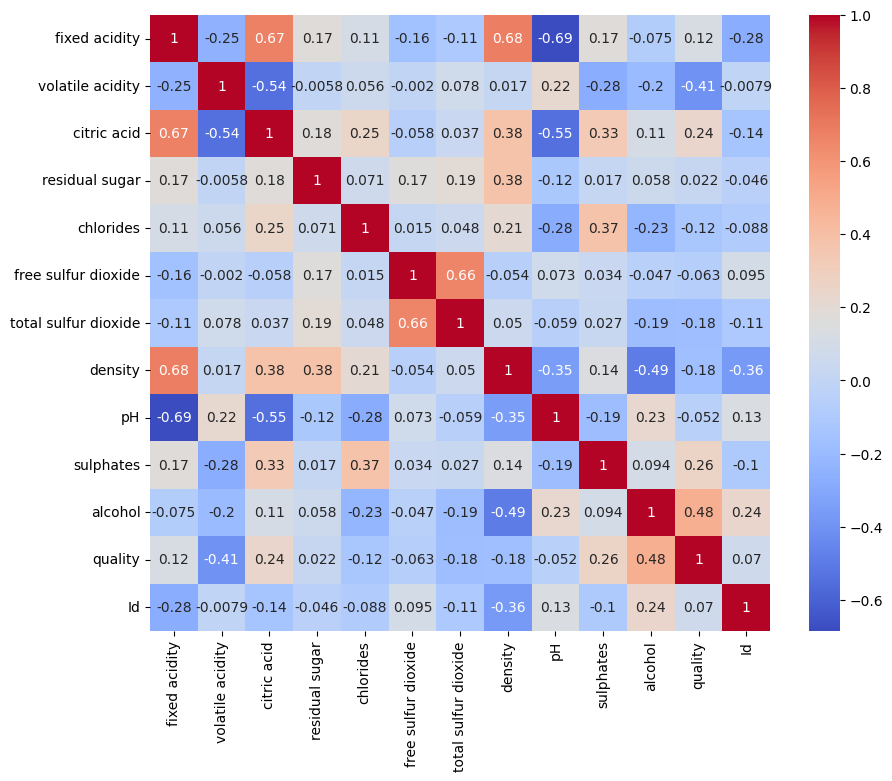

In [45]:
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]


print("Bar plot")
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

print("Heatmap")
plt.figure(figsize=(10, 8))
sns.heatmap(df02.corr(), annot=True, cmap='coolwarm')
plt.show()


# **Hyperparameter Tuning**

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.6356305723324706
